# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Marius Stumpe

Datum: 18.11.2023

Gruppe: 2

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Verläuft der Temperaturausgleich zwischen einer heißen Flüssigkeit und der Umgebung konstant?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.

Ich habe in ein Glas 200 ml heißes Wasser gefüllt und dort Sensor 1 hineingelegt. Sensor 2 habe ich außerhalb vom Glas gelassen, damit dieser die Umgebungstemperatur messen konnte. Dann habe die Messung gestartet und nach ca. zehn Minuten wieder beendet. 

<img src="figures/newton.jpg" width="800">

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

path_hdf5_newton = "data/newton/newton.h5"

# DONE #

In [3]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.

import h5py
sensor_temperature = []
sensor_time = []

hdf5_newton = h5py.File(path_hdf5_newton, "r")

for UUID in m_json.get_metadata_from_setup("datasheets/setup_newton.json")["sensor"]["values"]:
    sensor_temperature.append(np.array(hdf5_newton["RawData"][UUID]["temperature"]))
    sensor_time.append(np.array(hdf5_newton["RawData"][UUID]["time"]))

attributes_rawdata = []
for keys_rawdata in hdf5_newton.attrs.keys():
    attributes_rawdata.append(keys_rawdata + ": " + hdf5_newton.attrs[keys_rawdata])
print(attributes_rawdata)

attributes_sensors = []
for UUID in m_json.get_metadata_from_setup("datasheets/setup_newton.json")["sensor"]["values"]:
    for keys_sensors in hdf5_newton["RawData"][UUID].attrs.keys():
        attributes_sensors.append(keys_sensors + ": " + hdf5_newton["RawData"][UUID].attrs[keys_sensors])
print(attributes_sensors)

attributes_time = []
for keys_time in hdf5_newton["RawData"][UUID]["time"].attrs.keys():
    attributes_time.append(keys_time + ": " + hdf5_newton["RawData"][UUID]["time"].attrs[keys_time])
# Die "time" Attribute sind bei beiden Sensoren gleich.
print(attributes_time)

hdf5_newton.close()

# DONE #

['authors: Marius Stumpe', 'created: 17.11.2023', 'experiment: calorimetry_home', 'group_number: 2']
['name: temperature_cup', 'serial: 3ce504575fd8', 'name: temperature_environment', 'serial: 3ce1e3802a87']
['the_epoch: Donnerstag, der 1. Januar 1970, 00:00 Uhr UTC', 'time_convention: Unixzeit', 'time_explanation: Die Unixzeit zaehlt die vergangenen Sekunden seit The Epoch']


#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


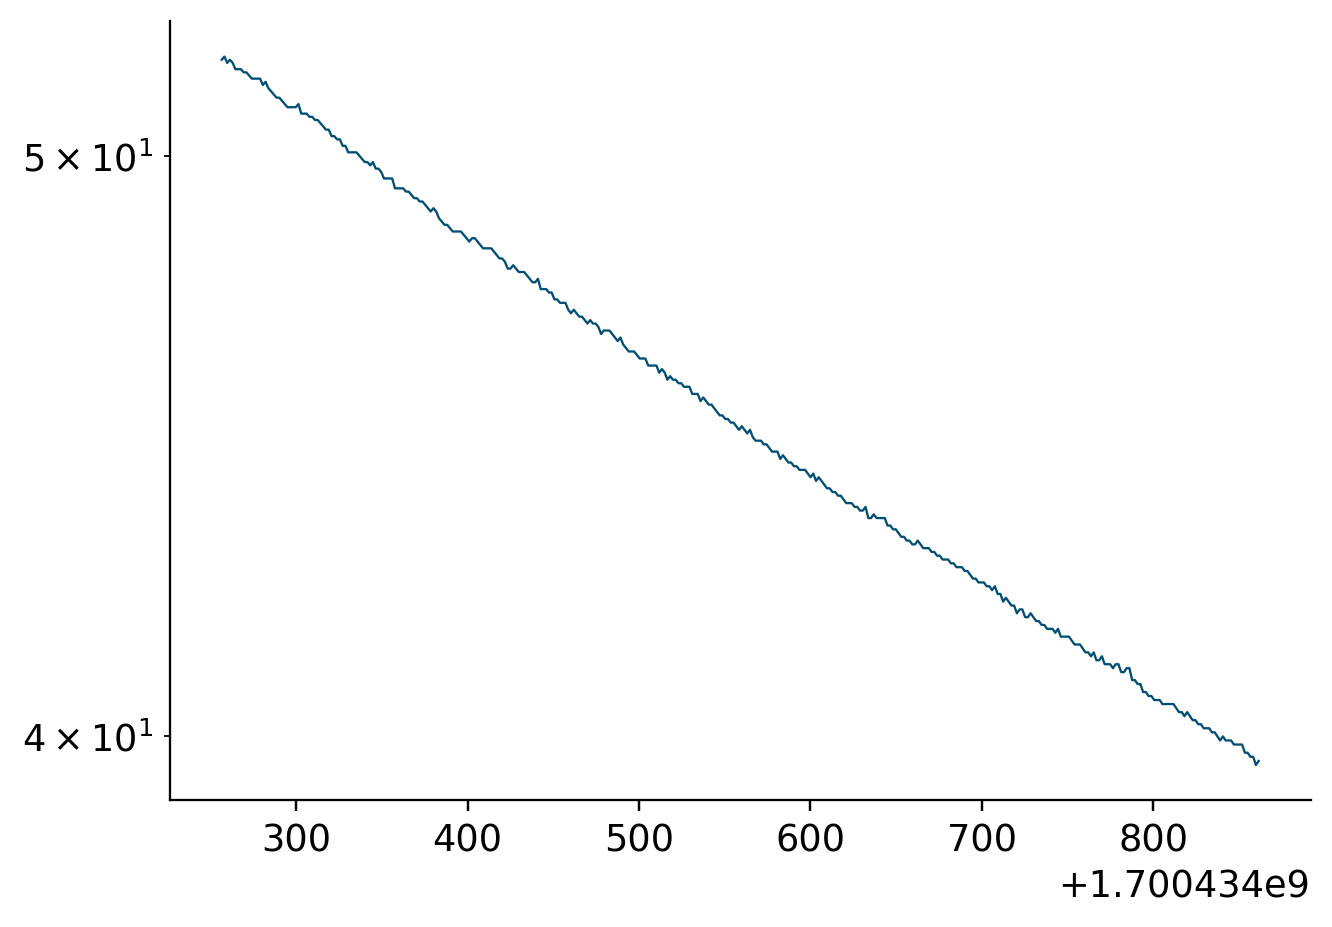

In [4]:
# TODO: Use the temperature and time data for plotting
if len(sensor_temperature[0]) > len(sensor_temperature[1]):
                sensor_temperature[0] = sensor_temperature[0][0 : len(sensor_temperature[1])]
                sensor_time[0] = sensor_time[0][0 : len(sensor_time[1])]
x = sensor_time[0]
y = sensor_temperature[0]-sensor_temperature[1]
plt.yscale("log")
plt.plot(x, y)
      
# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [5]:
### TODO: Determine coefficient in Newtonschen Abkühlungsgesetz
temperature_difference = list((sensor_temperature[0]-sensor_temperature[1]))
sensor_time[0] = list(sensor_time[0])
integers = []
for i in range(len(temperature_difference)):
    if temperature_difference[i] <= 0:
        integers.append(i)
for i in sorted(integers, reverse=True):
    del temperature_difference[i]
    del sensor_time[0][i]
temperature_difference = np.array(temperature_difference)
sensor_time[0] = np.array(sensor_time[0])
coefficient_x = sensor_time[0]
coefficient_y = np.log((temperature_difference)/(sensor_temperature[0][0]-sensor_temperature[1]))/sensor_time[0]
coefficient = np.polyfit(coefficient_x, coefficient_y, 1)
# DONE #

#### (iV) Ergebnis

In [6]:
# TODO: Print result

print("Der Koeffizient ist: (" + str(coefficient[0]) + ")x + " + str(coefficient[1]))

# DONE #

Der Koeffizient ist: (-2.6702895410510606e-13)x + 0.00045406517640943044


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaftlicher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Bei dem geplotteten Graphen erkennt man, dass er ziemlich gerade verläuft, wenn der Temperaturunterschied zwischen dem Getränk und der Umgebung logarithmisch dargestellt wird. Das bedeutet, dass der Temperaturausgleich zwischen dem Wasser und der Umgebung am Anfang schneller als am Ende verläuft. Der Temperaturausgleich ist also nicht Konstant. Stattdessen gilt das Newtonsche Abkühlungsgesetz. Der Wärmeverlust des heißen Wassers an die Umgebung ist proportional zu dem Temperaturunterschied zwischen dem Wasser und der Umgebung. Das erkennt man auch an der gegebenen Formel und dem Koeffizienten. Der Koeffizient ist negativ und wird mit der Zeit linear kleiner. An dem Verlauf der e-Funktion im negativen Exponentenbereich sieht man, dass je kleiner der Exponent ist, umso kleiner auch die Änderung der e-Funktion ist. Dementsprechend ändert sich auch die linke Seite der Gleichung also der Temperaturunterschied langsamer, umso mehr Zeit vergangen ist und umso kleiner der Temperaturunterschied bereits ist.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Mir hat der Versuch gut gefallen, da ich vor dem Versuch noch nicht wusste wie genau der Temperaturverlauf beim Abkühlen einer Flüssigkeit aussieht. Ich fand es auch interessant herauszufinden, dass man den Koeffizient anstatt einer Liste auch als Polynom darstellen kann.